* * *
<pre> INSEA                <i> Projet Statistiques Multivariées - 2025 </i></pre>
* * *


<pre align="left"> Mardi 4 Novembre  2025             <i> Author: Hicham Janati </i></pre>
* * *

Consignes:
----------
- Deadline: *Dimanche 7 Décembre 23h59* | tout retard d'1h = -1
- Tout travail doit être effectué par groupe de deux sans exception.
- Il faut nommer le fichier avec le numéro du groupe seulement `groupe_X.ipynb` pas de noms. 
- PAS DE PDF NI DE FICHIER WORD. UN NOTEBOOK UNIQUEMENT.
- Les noms des membres du groupe sont à mentionner en modifiant la ligne suivante:

Membre 1:

Membre 2: 

- Ce notebook contient 15 questions.
- Il faut executer tout le notebook (Run all cells) avant de l'envoyer: vérifier que les cellules sont exécutées dans le bon ordre et qu'il n'y a pas d'erreur, je ne vais pas débugger votre code. 
- Le code doit être propre et lisible et surtout comprendre ce qu'il fait par tous les membres du groupe.
- LIVRAISON UNIQUEMENT SUR DROPBOX (TOUT FICHIER ENVOYE PAR MAIL NE SERA PAS OUVERT):

https://www.dropbox.com/request/bs2Tafzm0Bzr7rroAGtc

Vous pouvez effectuer plusieurs uploads, seule la date la plus récente sera corrigée.

- Le but n'est pas de produire du code qui marche: le but est de comprendre et maîtriser les mécanismes derrière et savoir utiliser quoi et quand. Ce notebook est loin d'être self-contained, cherchez, lisez et apprenez à devenir auto-didacte.

# Partie 1: Les données

Les données sont coupés en deux: train et test. Il s'agit d'une liste d'SMS avec leur labels (Y) spam / non spam.

In [1]:
import numpy as np

X_train = np.load("data/X_train.npy", allow_pickle=True)
X_test = np.load("data/X_test.npy", allow_pickle=True)
Y_train = np.load("data/Y_train.npy", allow_pickle=True)
Y_test = np.load("data/Y_test.npy", allow_pickle=True)



<pre style="color:red;">                Aperçu des données </pre>


In [2]:
X_train[:4], Y_train[:4]


(array(['Play w computer? Aiyah i tok 2 u lor?',
        "Well there's not a lot of things happening in Lindsay on New years *sighs* Some bars in Ptbo and the blue heron has something going",
        'Dear are you angry i was busy dear',
        "Carlos'll be here in a minute if you still need to buy"],
       dtype=object),
 array([0, 0, 0, 0]))

In [3]:

import pandas as pd

df_train = pd.DataFrame({
    "SMS": X_train,
    "Label": Y_train
})

pd.set_option('display.max_colwidth', None)
df_train.head()


,SMS,Label
0,Play w computer? Aiyah i tok 2 u lor?,0
1,Well there's not a lot of things happening in Lindsay on New years *sighs* Some bars in Ptbo and the blue heron has something going,0
2,Dear are you angry i was busy dear,0
3,Carlos'll be here in a minute if you still need to buy,0
4,"A boy was late 2 home. His father: \POWER OF FRNDSHIP\""""",0


On rappelle que les données de `test` doivent être utilisées pour évaluer le modèle final comme si elles étaient nouvelles en production -- non disponibles à l'entraînement -- toute opération d'apprentissage (y compris la validation croisée) doit être faite sur les données `train` uniquement.

### Question 1
En utilisant ```CountVectorizer``` de ```scikit-learn``` transformez les données. Quelle est l'utilité de cette opération ?

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# 1️⃣ Créaction l’objet vectorizer
vectorizer = CountVectorizer()

# 2️⃣ Apprentissage du vocabulaire à partir de X_train et transformation des données
X_train_vec = vectorizer.fit_transform(X_train)

# 3️⃣ Transformation de X_test (sans refit, pour utiliser le même vocabulaire)
X_test_vec = vectorizer.transform(X_test)

#
print(X_train_vec.shape)
nb_sms, nb_vocabulaire = X_train_vec.shape
print("le nombre de sms de X_train est :", nb_sms )
print("le nombre de vocabulaire (mots distincts) que le modèle a appris est :", nb_vocabulaire )


(2786, 5870)
le nombre de sms de X_train est : 2786
le nombre de vocabulaire (mots distincts) que le modèle a appris est : 5870


#### Question 2:
On modélise les données de chaque classe par une loi multinomiale. En utilisant ```MultinomialNB``` de scikit-learn, fittez un modèle et évaluez sa performance en calculant les scores de précision et de rappel.

<pre style="color:red;">                Fitte des données </pre>


In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score

# Création de l'objet MultinomialNB
model = MultinomialNB()

# Entraînement du modèle sur X_train_vec et Y_train
model.fit(X_train_vec, Y_train)



,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


<pre style="color:red;">                Prédiction sur le jeu de test </pre>


In [6]:

Y_pred = model.predict(X_test_vec)


<pre style="color:red;">                Performance du modèle: Précision et rappel</pre>


In [7]:
# Précision : proportion des messages prédits comme spam qui sont réellement spam
precision = precision_score(Y_test, Y_pred)

# Rappel : proportion de vrais spams correctement détectés
recall = recall_score(Y_test, Y_pred)

print(f"Précision : {precision:.2f}")
print(f"Rappel    : {recall:.2f}")

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names=["Non spam", "Spam"]))


Précision : 0.97
Rappel    : 0.89
              precision    recall  f1-score   support

    Non spam       0.98      1.00      0.99      2413
        Spam       0.97      0.89      0.93       373

    accuracy                           0.98      2786
   macro avg       0.97      0.94      0.96      2786
weighted avg       0.98      0.98      0.98      2786



### Question 3:
Implémentez votre propre modèle naive bayes multinomial en utilisant numpy. Comparez avec scikit-learn.

<pre style="color:red;">                Implémentation de notre modèle                         </pre>



$N_c$ ` = nombre de SMS dans la classe c : ici c est soit 0 ou 1 (non Spam ou Spam) `
<br>
$N$ `= Nombre total de SMS (ici dans X_train )`
<br>
`La probabilité de la classe  c est :` $P(c) = \frac{N_c}{N}$
<br>
`La probabilité conditionnelle d'un mot w donné la classe c est :` $P(w|c) = \frac{Count(w,c) + 1}{Somme(Count(w,c)) + V}$ `où` $V$ `est le vocabulaire total (nombre de mot unique dans X_train)` $Count(w,c)$ ` est le nombre d'occurence de chaque vocabulaire dans la classe c`




In [8]:
import numpy as np

class MyMultinomialNB:
    def fit(self, X, y):
        # X shape: (n_samples, n_features)
        # y shape: (n_samples,)
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        
        # Prior: P(c)
        self.class_prior = {}
        for c in self.classes:
            self.class_prior[c] = np.sum(y == c) / n_samples
        
        # Likelihood: P(word | class)
        self.likelihood = {}
        for c in self.classes:
            X_c = X[y == c]     # docs de la classe c
            word_counts = X_c.sum(axis=0)  # somme des occurrences par mot
            
            # Laplace smoothing
            self.likelihood[c] = (word_counts + 1) / (word_counts.sum() + n_features)
        
        return self

    def predict(self, X):
        preds = []
        for x in X:
            class_scores = {}
            for c in self.classes:
                log_prior = np.log(self.class_prior[c])
                log_likelihood = np.sum(x * np.log(self.likelihood[c]))
                class_scores[c] = log_prior + log_likelihood
            
            # classe avec score max
            preds.append(max(class_scores, key=class_scores.get))
        return np.array(preds)


<pre style="color:red;">                Comparaison avec scikit-learn                        </pre>


In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score

# Votre X_train_vec, X_test_vec
# Vos y_train, y_test

# --- Notre modèle NumPy ---
my_nb = MyMultinomialNB()
my_nb.fit(X_train_vec.toarray(), Y_train)
Y_pred_custom = my_nb.predict(X_test_vec.toarray())

# --- Modèle de scikit-learn ---
sk_nb = MultinomialNB()
sk_nb.fit(X_train_vec, Y_train)
Y_pred_sklearn = sk_nb.predict(X_test_vec)

# Comparaison des performances
print("Custom NB - Précision :", precision_score(Y_test, Y_pred_custom, pos_label=1))
print("Custom NB - Rappel :", recall_score(Y_test, Y_pred_custom, pos_label=1))

print("\nSklearn NB - Précision :", precision_score(Y_test, Y_pred_sklearn, pos_label=1))
print("Sklearn NB - Rappel :", recall_score(Y_test, Y_pred_sklearn, pos_label=1))


Custom NB - Précision : 0.9651162790697675
Custom NB - Rappel : 0.8900804289544236

Sklearn NB - Précision : 0.9651162790697675
Sklearn NB - Rappel : 0.8900804289544236


### Question 4:
Afin de comparer avec d'autres modèles qui s'attendent à des inputs continus, on peut utiliser des fréquences de mots au lieu du nombre brut. Appliquez la transformation `TfIdf` de scikit-learn sur les données. Fittez des modèles différents: LDA, régression logistique, QDA et SVM. Essayez de battre la performance du MultinomialNB. 

<pre style="color:red;">                Transformation TF-IDF                       </pre>


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


<pre style="color:red;">                Entraînement du modèle LDA</pre> 
`LDA ne supporte pas les matrices creuses → on convertit en .toarray()`


In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_tfidf.toarray(), Y_train)
Y_pred_lda = lda.predict(X_test_tfidf.toarray())


<pre style="color:red;">                Régression Logistique                       </pre>
`Très adapté à détection de spam TF-IDF`


In [12]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_tfidf, Y_train)
Y_pred_logreg = logreg.predict(X_test_tfidf)


<pre style="color:red;">                QDA                       </pre>
`Il nécessite une matrice dense: on ajoute 0.1I à la matrice de covariance pour ne pas avoir de problème d'inversibilité (la rendre inversible).`


In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(reg_param=1)
qda.fit(X_train_tfidf.toarray(), Y_train)
Y_pred_qda = qda.predict(X_test_tfidf.toarray())


c:\A2_S3\Partie_1\Statistique_Multivariee\Project_NLP_2025\Mienv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\A2_S3\Partie_1\Statistique_Multivariee\Project_NLP_2025\Mienv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


<pre style="color:red;">                SVM                       </pre>


In [14]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_tfidf, Y_train)
Y_pred_svm = svm.predict(X_test_tfidf)


<pre style="color:red;">                Evalution et Comparaison avec le modèle Multinomial                       </pre>


In [15]:
from sklearn.metrics import precision_score, recall_score

def evaluate(name, y_true, y_pred):
    print(f"\n--- {name} ---")
    print("Précision :", precision_score(y_true, y_pred))
    print("Rappel    :", recall_score(y_true, y_pred))

evaluate("Multinomial", Y_test, Y_pred)
evaluate("LDA", Y_test, Y_pred_lda)
evaluate("Régression Logistique", Y_test, Y_pred_logreg)
evaluate("QDA", Y_test, Y_pred_qda)
evaluate("SVM", Y_test, Y_pred_svm)



--- Multinomial ---
Précision : 0.9651162790697675
Rappel    : 0.8900804289544236

--- LDA ---
Précision : 0.9868852459016394
Rappel    : 0.806970509383378

--- Régression Logistique ---
Précision : 0.9956140350877193
Rappel    : 0.6085790884718498

--- QDA ---
Précision : 0.0
Rappel    : 0.0

--- SVM ---
Précision : 0.9762611275964391
Rappel    : 0.8820375335120644


c:\A2_S3\Partie_1\Statistique_Multivariee\Project_NLP_2025\Mienv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### Question 5:
Visualisez la PCA et tSNE des données transformées.


<pre style="color:red;">                PCA = réduction linéaire → garde les directions de plus grande variance                       </pre>


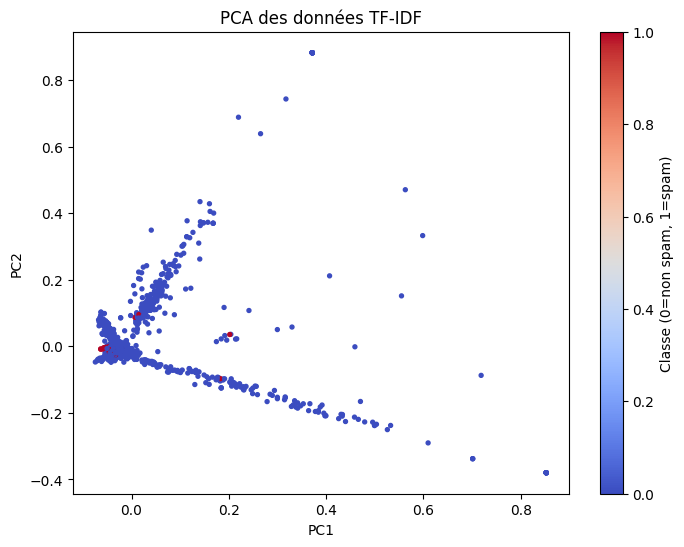

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# pour PCA, on utilise une matrice dense.
X_dense = X_train_tfidf.toarray()

# PCA à 2 composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y_train, cmap="coolwarm", s=8)
plt.title("PCA des données TF-IDF")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Classe (0=non spam, 1=spam)")
plt.show()


<pre style="color:red;">                t-SNE = réduction non linéaire → révèle la structure par clusters (spam vs non spam)                       </pre>


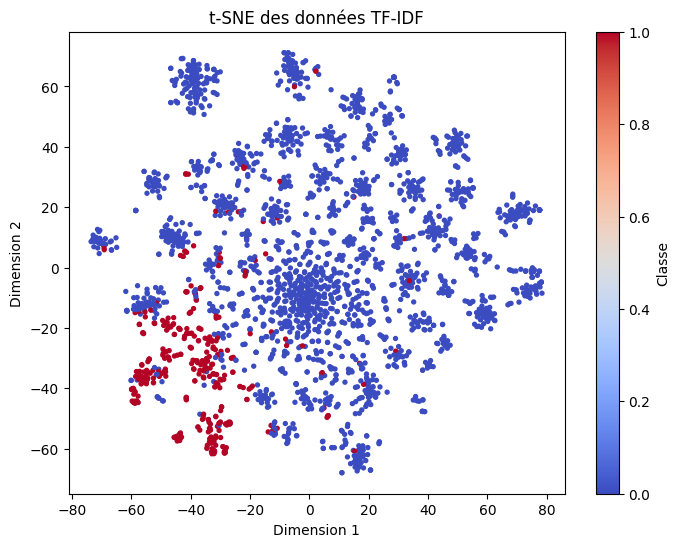

In [17]:
from sklearn.manifold import TSNE

# Réduction initiale à 50 dimensions
pca50 = PCA(n_components=50)
X_50 = pca50.fit_transform(X_dense)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1500)
X_tsne = tsne.fit_transform(X_50)

# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=Y_train, cmap="coolwarm", s=8)
plt.title("t-SNE des données TF-IDF")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label="Classe")
plt.show()


# Partie II: Introduction au NLP

Dans cette partie on utilise des transformations plus avancées basées sur la factorisation matricielle. L'un des premiers modèles à grand succès pour représenter les mots est `Word2Vec`. Étant donné un vocabulaire de taille V, on peut représenter un input par un vecteur binaire de taille V (one-hot encoding). Par exemple si le vocabulaire est
```["rouge", "chat", "souris", "courir", "mange", "ordinateur", "la", "le", ...]``` 
Alors on peut représenter chaque mot par son vecteur one-hot de taille V:
- "chat" -> [0, 1, 0, 0, 0, ...]
- "ordinateur" -> [0, 0, 0, 0, 0, 1, 0, ...]

La phrase "le chat mange la souris" peut être représentée par [0, 1, 1, 0, 1, 0, 1, 1, ...].

On construit un réseau de neurones simple capable de prédire le mot manquant au milieu d'une phrase avec des données comme:
- "le chat la souris" -> "mange"
- "la matrice est pas inversible" -> "n'" 
...
Ainsi, l'input du réseau doit être un vecteur de taille V. L'output doit être également **un vecteur de probabilités** de taille V. On prédit le mot avec la plus grande probabilité.

On considère un réseau de neurones à une couche cachée de dimension M (M neurones). Le réseau de neurones doit en sortie prédire un mot caché. Soit $x \in \mathbb R^V$ un one-hot vecteur. Le réseau de neurones peut être défini formellement comme suit. Soit $W_{in} \in \mathbb{R}^{V \times M}$ et $W_{out} \in \mathbb{R}^{M \times V}$. 

$$ g(x) = W_{out}(W_{in}x) \in \mathbb R^{V} $$

Pour obtenir un vecteur output positif et sommant à 1 (des probabilités sur les mots), on applique la fonction softmax:
$$ softmax: z \in \mathbb R^V \mapsto \left[\frac{e^{z_1}}{\sum_j e^{z_j}}, \dots, \frac{e^{z_V}}{\sum_j e^{z_j}}  \right]^\top$$

Ainsi on définit: $ neuralnet(x) = softmax(g(x))$ et on entraîne le modèle avec la loss cross-entropy.
 
Après avoir entraîné le modèle, les ligne de la matrice $W_{in}$ sont les embeddings des mots du vocabulaire.


On commence par télécharger le modèle word2vec (peut prendre du temps):

In [18]:
import gensim.downloader as api

word2vec = api.load("word2vec-google-news-300")


word2vec est n'est qu'un dictionnaire spécial "mot" -> vecteur:


In [19]:
word2vec


In [20]:
word2vec["computer"]


array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

On peut obtenir l'embedding de plusieurs mots directement dans une liste. L'embedding d'une phrase est souvent défini comme la moyenne des embeddings de ses mots.

In [21]:
word2vec[["computer", "mouse", "keyboard"]].shape


(3, 300)

In [22]:
word2vec[["I", "love", "computers"]].mean(axis=0).shape


(300,)

### Question 6
Pour appliquer word2vec aux SMS, il faut d'abord les découper en mots. Implémentez une fonction naïve qui transforme un SMS en liste de mots ou _tokens_. C'est ce qu'on appelle un tokenizer.

### Question 7
On peut vérifier si un mot fait partie du vocabulaire avec le test:

In [23]:
"computer" in word2vec


True

Proposez une solution pour appliquer word2vec aux données SMS. Est-il meilleur comme embedding comparé au `CountVectorizer` ?

`Word2vec` (2013) est l'un des premiers modèles de représentation vectorielle du langage naturel. L'une de ses limitations principales est le fait de ne pas pouvoir représenter des mots (ou bouts de mots) non-vus lors de l'entraînement. Quelques années plus tard, plusieurs avancées ont été introduites pour y remédier:

### 1) Améliorer la tokenization:
1. Au lieu de considérer un vocabulaire avec des mots, on considère un vocabulaire avec les mots, et les bouts de mots (ngrams):

    "diagonalisation matricielle" -> "diagonal", "isation", " ", "matric", "ielle". 

    Ceci est utilisé dans le modèle `fastText` (2016) dont l'architecture est similaire à celle de Word2Vec.

2. WordPiece: approche bottom-up où le vocabulaire des tokens est construit en mergeant les caractères (a-Z, 0-9, symboles et ponctuation) + Ajouter des tokens spéciaux "[UNK]" (unknow) pour gérer les tokens non-vus, "[SEP]" (séparateur entre phrases ou textes), "[MASK]" (token qui veut dire "ce mot est à prédire") etc. Ce tokenizer est utilisé dans l'un des premiers modèles basés sur l'architecture Transformer (BERT) (2018).

3. Byte-pair encoding (BPE): similaire à WordPiece mais à l'échelle du byte.  Ceci permet d'encoder n'importe quel string dans n'importe quelle langue: mots rares, typos, emojis, kanji... C'est le tokenizer adopté par l'un des fameux modèles de traduction à l'époque (Neural Machine Translation -- NMT 2015) pour traduire les mots rares; et ensuite par les modèles GPT (2018). Avec BPE, on n'a plus besoin du token spécial _unknown_ [UNK]. Vous pouvez voir comment le texte est tokenisé par GPT en visitant https://platform.openai.com/tokenizer. 

### 2) Améliorer l'architecture

1. Limites de Word2Vec et companie:

La nature des données de langage est séquentielle (comme les séries temporelles, mot après mot..), or les modèles comme Word2Vec et ses variantes (Fasttext, GloVe) ne prennent pas en considération l'ordre des mots: ils sont appliqués à des _bag of words_. En plus, même si ses modèles utilisent le contexte voisin, après l'entraînement, l'embedding d'un mot est le même quelque soit son contexte ce qui limite la compréhension des différentes nuances d'un même mot. 

2. Recurrent Neural Networks:

L'architecture des réseaux de neurones récurrents (RNN) et ses variantes (LSTM, GRU) développés principalement dans les années 1990 sont revisités en (2013-2020) après le succès du deep learning (2012+) avec la réalisation de la grande puissance de calcul des GPUs. Ils permettent de prendre en considération l'aspect temporel des données mais restent difficiles à entraîner (nécessitent beaucoup de temps + instabilité des gradients). 

3. Transformers (en très bref):

En 2017, l'architecture des Transformers est introduite. Son avantage principal est son formalisme matriciel qui est beaucoup plus parallélisable que les RNNs, et donc permet d'entraîner des modèles plus grands sur des données beaucoup plus grandes. Prenons le cas d'une architecture générative (GPT). Un transformer définit une structure appelée _Self-Attention Head_ qui fonctionne comme suit.
Étant donnés les embeddings (statiques comme ceux de Word2Vec) des tokens d'une phrase, le mécanisme d'attention consiste à calculer des scores de similarités (produits scalaires) entre chaque paire d'embeddings, ceci permet d'obtenir une matrice de scores "d'attention" entre les tokens.

Par exemple, pour une phrase "Il me faut un tapis pour la souris Logitec", l'embedding du mot "souris" sera pondéré par ses scores de similarité avec chacun des autres mots ["Il", "me", "faut", "un", "tapis", "pour", "la", "logitec"]. Ainsi, l'embedding d'un même mot dépend du contexte. Ceci permettra de distinguer la souris (animal) de la souris d'ordinateur.

 Ceci reste une explication très simpliste du mécanisme d'attention, pour visualiser le concept, regardez la vidéo de 3b1b https://www.youtube.com/watch?v=eMlx5fFNoYc.







## III Partie 3 - Embeddings basés sur les transformers

Dans cette partie, on passe à l'artillerie lourde: embeddings basés sur les transformers. On utilise ceux de BERT plutôt que GPT car BERT a été conçu pour la classification supervisée alors que GPT pour la génération de texte: l'embedding de BERT est plus pertinent pour notre problématique.

On commence par tokeniser les données. Voici ce que donne le tokenizer avec une phrase par exemple:

In [24]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


c:\A2_S3\Partie_1\Statistique_Multivariee\Project_NLP_2025\Mienv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
text = "Hey, are you free tomorrow at 8 ? gotta catch up bud."
tokens = tokenizer.tokenize(text)
tokens


['hey',
 ',',
 'are',
 'you',
 'free',
 'tomorrow',
 'at',
 '8',
 '?',
 'gotta',
 'catch',
 'up',
 'bud',
 '.']

Le modèle BERT en revanche ne s'attend pas à des tokens en texte, mais aux token_ids:

In [26]:
text = "Hey, are you free tomorrow at 8 ? gotta catch up bud"
token_ids = tokenizer(text, return_tensors="pt")
token_ids


{'input_ids': tensor([[  101,  4931,  1010,  2024,  2017,  2489,  4826,  2012,  1022,  1029,
         10657,  4608,  2039, 13007,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

On fait appel ensuite au modèle BERT. On peut voir les composants de son architecture:

In [27]:
bert_model = AutoModel.from_pretrained("bert-base-uncased")
bert_model.eval()
bert_model


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

On applique le modèle aux token_ids sans calcul de gradient:

In [28]:
import torch
with torch.no_grad():
    outputs = bert_model(**token_ids)
outputs


BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.3836,  0.0548, -0.0066,  ..., -0.2580,  0.3390,  0.2724],
         [ 0.6628, -0.0560,  0.9965,  ...,  0.0643,  1.2164, -0.4075],
         [ 0.1342,  0.0883,  0.7119,  ..., -0.0816,  1.2578,  0.1409],
         ...,
         [ 0.8804, -0.9000,  0.7776,  ...,  0.3333,  0.4174, -0.7230],
         [ 0.4084, -0.3247,  0.8299,  ...,  0.8601,  0.5027, -0.3476],
         [ 0.4914,  0.0527, -0.1084,  ..., -0.1167, -0.4205, -0.2667]]]), pooler_output=tensor([[-8.6382e-01, -5.2100e-01, -9.1143e-01,  7.4742e-01,  6.9650e-01,
         -2.0079e-01,  8.5602e-01,  3.7551e-01, -7.7920e-01, -9.9999e-01,
         -4.6733e-01,  8.6761e-01,  9.8091e-01,  5.1904e-01,  9.3339e-01,
         -7.2372e-01, -2.1201e-01, -6.3463e-01,  3.1704e-01, -3.3231e-01,
          7.0444e-01,  9.9999e-01,  5.4936e-02,  3.5607e-01,  5.5947e-01,
          9.8429e-01, -7.8516e-01,  9.2725e-01,  9.5860e-01,  7.1539e-01,
         -6.2374e-01,  1.7224e-01, -

On peut accéder aux embeddings en cherchant la dernière couche cachée:

In [29]:
outputs.last_hidden_state


tensor([[[ 0.3836,  0.0548, -0.0066,  ..., -0.2580,  0.3390,  0.2724],
         [ 0.6628, -0.0560,  0.9965,  ...,  0.0643,  1.2164, -0.4075],
         [ 0.1342,  0.0883,  0.7119,  ..., -0.0816,  1.2578,  0.1409],
         ...,
         [ 0.8804, -0.9000,  0.7776,  ...,  0.3333,  0.4174, -0.7230],
         [ 0.4084, -0.3247,  0.8299,  ...,  0.8601,  0.5027, -0.3476],
         [ 0.4914,  0.0527, -0.1084,  ..., -0.1167, -0.4205, -0.2667]]])

In [30]:
for i in range(15):
    print(outputs.last_hidden_state[0][i][0])


tensor(0.3836)
tensor(0.6628)
tensor(0.1342)
tensor(0.6478)
tensor(0.3942)
tensor(1.1462)
tensor(0.6561)
tensor(0.5340)
tensor(0.7182)
tensor(0.7274)
tensor(0.8628)
tensor(1.1637)
tensor(0.8804)
tensor(0.4084)
tensor(0.4914)


### Question 8
Expliquez la dimension obtenue de ces embeddings. On souhaite obtenir les embeddings de toutes les données directement. Appliquez la tokenization à la liste de textes suivante. Quel problème se pose ? Comment y remédier ?

<pre style="color:red;">                Dimension de ces embeddings                       </pre>


In [31]:
outputs.last_hidden_state.shape


torch.Size([1, 15, 768])

<pre style="color:yellow;">On a obtenu une dimension de [1, 15, 768]   qui represente : (batch_size, sequence_length, hidden_size)
- batch_size = nombre de phrases traitées : ici une seule phrase d'où batch_size = 1.
- sequence_length = nombre de tokens (après tokenisation) :  ici 15
- hidden_size = 768 qui est propre à bert-base-uncased : Chaque token est un vecteur de dimension 768

                   </pre>


In [32]:
texts = ["Hey, are you free tomorrow at 8 ? gotta catch up bud.", "Sure thing, let's go."]


<p>

<pre style="color:red;">                Application                      </pre>
Quand on tokenise une liste de textes, les phrases n’ont pas forcement la même longueur après tokenisation (ce qui est notre cas). Le tokenizer ne peut donc pas convertir ces listes en un tenseur PyTorch rectangulaire, ce qui provoque l’erreur ValueError: expected sequence of length X (got Y).

Pour y remédier, il faut activer le padding automatique (et ausssi tronquer au cas où des phrases seraient trop longues):
</p>


In [33]:
token_ids = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)


### Question 9
Après avoir fixé le problème, analysez les tokens obtenus et le `attention_mask` de l'output. Comment peut-on savoir où le `padding` a été appliqué ?

In [34]:
token_ids


{'input_ids': tensor([[  101,  4931,  1010,  2024,  2017,  2489,  4826,  2012,  1022,  1029,
         10657,  4608,  2039, 13007,  1012,   102],
        [  101,  2469,  2518,  1010,  2292,  1005,  1055,  2175,  1012,   102,
             0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]])}

<pre style="color:red;">                Analyse du résultat                       </pre>


In [35]:
print(token_ids['input_ids'])
print('-----------------------------------------------------------------------')
print(token_ids['attention_mask'])


tensor([[  101,  4931,  1010,  2024,  2017,  2489,  4826,  2012,  1022,  1029,
         10657,  4608,  2039, 13007,  1012,   102],
        [  101,  2469,  2518,  1010,  2292,  1005,  1055,  2175,  1012,   102,
             0,     0,     0,     0,     0,     0]])
-----------------------------------------------------------------------
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]])


Les `input_ids` représentent les`tokens`:
Après avoir appliqué la tokenisation avec padding=True, les séquences ont été complétées par des tokens 0 (token de padding).
On peut identifier précisément les positions où le padding a été ajouté grâce au attention_mask :

Les positions où `attention_mask = 1` correspondent à de vrais tokens.

Les positions où `attention_mask = 0` correspondent au padding ajouté automatiquement pour homogénéiser la taille des séquences du batch.

Dans notre exemple, la seconde phrase est plus courte : les `six derniers tokens` sont du `padding`.

### Question 10
L'embedding d'une phrase est la moyenne des embeddings de ses tokens. Appliquez BERT à une liste des donnés spams (X_train[:10]). Calculez le temps pris par cette opération en utilisant la librairie `time`. 

In [36]:
import time
import torch
from transformers import AutoTokenizer, AutoModel

# Charger tokenizer et modèle
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = AutoModel.from_pretrained("bert-base-uncased")
bert_model.eval()

# Exemple : prendre les 10 premiers spams
texts = X_train[:10].tolist()

# Mesure du temps
start = time.time()

# Tokenization en batch
encodings = tokenizer(
    texts,
    padding=True,
    truncation=True,
    return_tensors="pt"
)

# Passage dans BERT
with torch.no_grad():
    outputs = bert_model(**encodings)

# embeddings token-level → (batch, seq_len, hidden_size)
token_embeddings = outputs.last_hidden_state

# embedding de phrase = moyenne des tokens (masque pour ignorer padding)
attention_mask = encodings.attention_mask.unsqueeze(-1)
masked_embeddings = token_embeddings * attention_mask
sentence_embeddings = masked_embeddings.sum(dim=1) / attention_mask.sum(dim=1)

end = time.time()

print("Shape des embeddings de phrase :", sentence_embeddings.shape)
print("Temps d'exécution :", end - start, "secondes")


Shape des embeddings de phrase : torch.Size([10, 768])
Temps d'exécution : 0.7828414440155029 secondes


In [37]:
sentence_embeddings


tensor([[-0.0564, -0.1076,  0.6513,  ..., -0.4246,  0.0462,  0.4692],
        [ 0.0358,  0.0857,  0.2621,  ..., -0.0973,  0.1805, -0.2364],
        [ 0.1228,  0.0549,  0.4160,  ..., -0.2058, -0.2241,  0.0953],
        ...,
        [-0.1341, -0.0053,  0.5895,  ..., -0.1020, -0.0945,  0.1375],
        [ 0.1571,  0.0146,  0.8795,  ..., -0.1717,  0.2741,  0.3540],
        [ 0.2312, -0.2384,  0.1143,  ...,  0.2611,  0.1618,  0.1737]])

### Question 11
Avec une GPU, ce calcul peut être jusqu'à 100x fois plus rapide. On vous fournit les embeddings des données `X_train` et `X_test` calculés avec BERT. Refaire l'étape de visualisation et classification avec ces embeddings pour comparer. 

In [38]:
import numpy as np
X_train_bert = np.load("data/embeddings_train.npy")
X_test_bert = np.load("data/embeddings_test.npy")

# Normalisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bert)
X_test_scaled  = scaler.transform(X_test_bert)

# Réduction de dimension
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)


- `Visualisation`

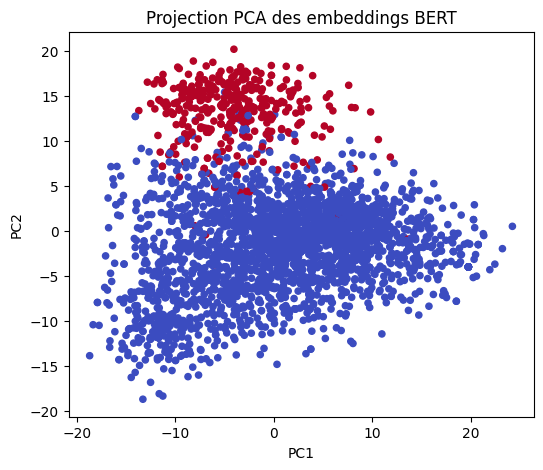

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=Y_train, cmap="coolwarm", s=20)
plt.title("Projection PCA des embeddings BERT")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



- `Classification`

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

clf = LogisticRegression(max_iter=2000)
clf.fit(X_train_scaled, Y_train)

Y_pred = clf.predict(X_test_scaled)

print("Accuracy :", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


Accuracy : 0.9917444364680545
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2413
           1       0.99      0.95      0.97       373

    accuracy                           0.99      2786
   macro avg       0.99      0.97      0.98      2786
weighted avg       0.99      0.99      0.99      2786



- `Comparaison`

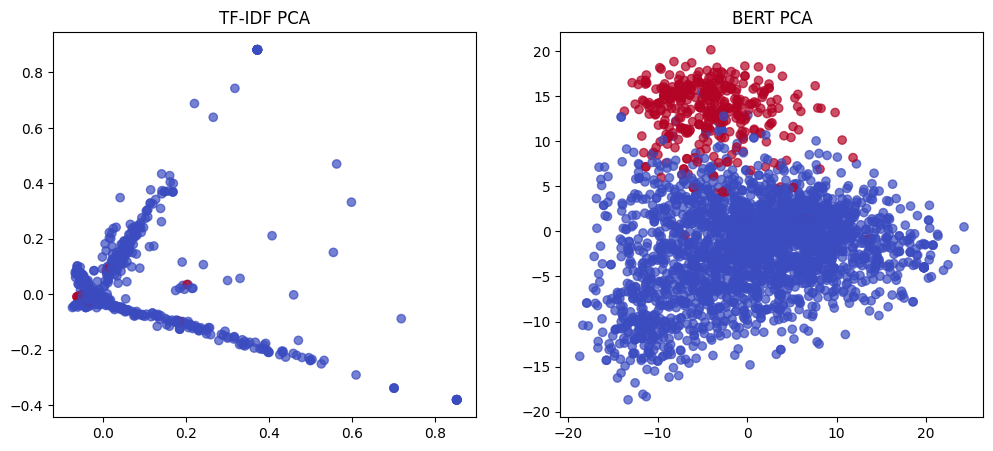

In [41]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y_train, cmap="coolwarm", alpha=0.7)
plt.title("TF-IDF PCA")

plt.subplot(1,2,2)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=Y_train, cmap="coolwarm", alpha=0.7)
plt.title("BERT PCA")

plt.show()


# IV Partie 4: Data drift 
En production, les données nouvelles peuvent devenir de plus en plus différentes des données d'entraînement avec le temps: on parle de _data drift_ ou de _distribution shift_. Il faut alors réentraîner le modèle sur des données plus récentes. 


### Question 12
Appliquez une PCA pour la réduire et implémentez un test statistique pour comparer les moyennes des embeddings Train et Test.

### Question 13
En pratique, comparer les moyennes des distributions n'est pas suffisant pour détecter le drift. Si on obtient les vrais labels (même avec un petit retard), alors  on peut calculer les métriques de performances (précision, rappel) au cours du temps. Sinon, on peut chercher à prédire si un échantillon vient du train ou du test ! L'idée est: si un modèle ML est capable de les distinguer: il y a forcément un drift. Trouvez le meilleur modèle capable de le faire en utilisant les embeddings de BERT. 

## V Partie 5: Modélisation non supervisée

#### Question 14
Sans utiliser les labels, modéliser en utilisant le modèle GMM de `scikit-learn` les données (BERT embeddings + PCA) en utilisant quelques modèles différents (nombre de composantes 2 vs 3 -- et type de covariance). Comparez les performances avec les vrais labels.

### Question 15
Comparez ces modèles en utilisant le test du rapport de vraisemblance. Quel est le modèle plausible le plus simple ?